In [10]:
import pandas as pd
import numpy as np

## Chargement des données

In [2]:
# Le jeu de données contient des caractéristiques de champignons avec notamment une colonne "class"
# qui nous indique s'il est comestible ('e' = 'edible') ou non ('p' = 'poisonous')
raw_data = pd.read_csv('mushrooms.csv')
raw_data.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [3]:
# Les lettres ne sont pas évidentes à comprendre, on va donc les remplacer par des chiffres
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

for col in raw_data.columns:
    raw_data[col] = labelencoder.fit_transform(raw_data[col])

raw_data.head()

class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0                       7                       7          0           2   
1                       7                       7          0           2   
2                       7                       7          0           2   
3                       7                       7          0           2   
4                       7                       7          0           2   

   ring-number  ring-type  spore-print-color  population  habitat  
0            1          4                  2           3        5  
1            1          4                  3           2        1  
2            1          4                  3           2        3  
3            1          4                  2           3        5  
4            1          0                  3           0        1  

[5 rows x 23 columns]

In [6]:
# On définit nos entrées/sorties
X = raw_data.iloc[:,1:23]
y = raw_data.iloc[:,0]

# Puis nos jeux de train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## Régression logistique

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

lr = LogisticRegression(solver='liblinear')

# Entraînement de la régression logistique
lr.fit(X_train, y_train)

# On récupère la prédiction de la valeur positive
y_prob = lr.predict_proba(X_test)[:,1]
print('y_prod = ' + str(y_prob))

# On créé un vecteur de prédiction à partir du vecteur de probabilités
y_pred = np.where(y_prob > 0.5, 1, 0)
print('y_pred = ' + str(y_pred))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc = ' + str(roc_auc))

y_prod = [0.09417768 0.02981746 0.09106521 ... 0.02429017 0.14310324 0.28860281]
y_pred = [0 0 0 ... 0 0 0]
roc_auc = 0.9804562926472947


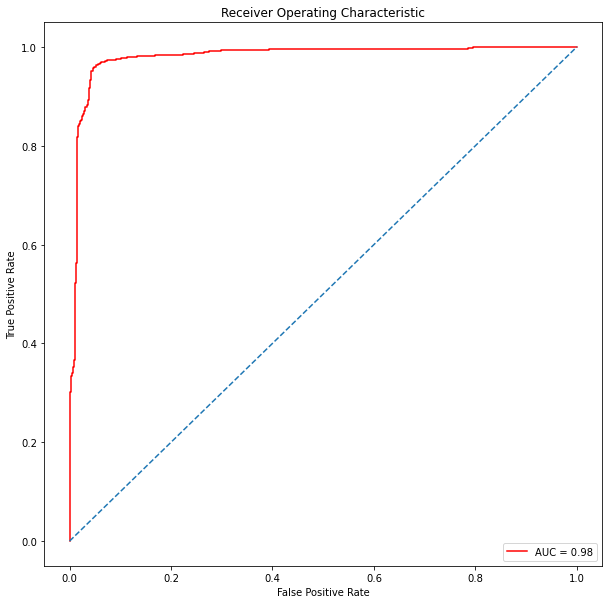

In [14]:
# On affiche l'AUC
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(solver = 'liblinear')
params = {'C': np.logspace(-3, 3, 7) , 'penalty':['l1','l2'] }

lr_gs = GridSearchCV(lr, params, cv=10)
lr_gs.fit(X_train, y_train)

print(lr_gs.best_params_)

C:\Users\pierr\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\pierr\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\pierr\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\pierr\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\pierr\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

{'C': 100.0, 'penalty': 'l1'}


In [ ]:
# On récupère la prédiction de la valeur positive
y_prob = lr_gs.predict_proba(X_test)[:,1]

# On créé un vecteur de prédiction à partir du vecteur de probabilités
y_pred = np.where(y_prob > 0.5, 1, 0)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)